In [208]:
import epics_archiver
import datetime
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate

In [274]:
start_time = '2019_11_06_20_0_0'
stop_time = '2019_11_07_12_0_0'

start_datetime = datetime.datetime.strptime(start_time, "%Y_%m_%d_%H_%M_%S")
stop_datetime = datetime.datetime.strptime(stop_time, "%Y_%m_%d_%H_%M_%S")
#stop_datetime = start_datetime + datetime.timedelta(seconds = 5)

dhe='1082'

data_dict={}

### Belle2
b2_archiver = epics_archiver.epics_archiver("172.22.16.120:17668")
time.sleep(1)

#data_dict['runnumber'] = b2_archiver.getData('DAQ:RC:RunNumber', 
#                        b2_archiver.date_parser(start_datetime), b2_archiver.date_parser(stop_datetime))   
data_dict['runstate'] = b2_archiver.getData('DAQ:RC:State', 
                        b2_archiver.date_parser(start_datetime), b2_archiver.date_parser(stop_datetime))   


## svd
#svd_archiver = epics_archiver.epics_archiver("172.22.18.120:17668") 
#time.sleep(1)

#data_dict['svd'] = svd_archiver.getData('SVD:CTRL:State', svd_archiver.date_parser(start_datetime), svd_archiver.date_parser(stop_datetime))  

## pxd
archiver = epics_archiver.epics_archiver("172.22.18.80:80")
time.sleep(1)

data_dict['%s_occ'%dhe] = archiver.getData('PXD:O:H%s:AVG:OCC:cur'%dhe, 
                        b2_archiver.date_parser(start_datetime), b2_archiver.date_parser(stop_datetime))   
data_dict['%s_clear-on'%dhe] = archiver.getData('PXD:P%s:clear-on:CURR:cur'%dhe, 
                        b2_archiver.date_parser(start_datetime), b2_archiver.date_parser(stop_datetime))   
data_dict['%s_clear-off'%dhe] = archiver.getData('PXD:P%s:clear-off:CURR:cur'%dhe, 
                        b2_archiver.date_parser(start_datetime), b2_archiver.date_parser(stop_datetime))   
data_dict['%s_state'%dhe] = archiver.getData('PXD:P%s:State:cur:S'%dhe, 
                        b2_archiver.date_parser(start_datetime), b2_archiver.date_parser(stop_datetime))   
data_dict['commitid'] = archiver.getData('PXD:B:config-commitid', 
                        b2_archiver.date_parser(start_datetime), b2_archiver.date_parser(stop_datetime))
#data_dict['runstate'] = archiver.getData('PXD:RC:State:cur:S', 
#                        b2_archiver.date_parser(start_datetime), b2_archiver.date_parser(stop_datetime))


print('done')


done


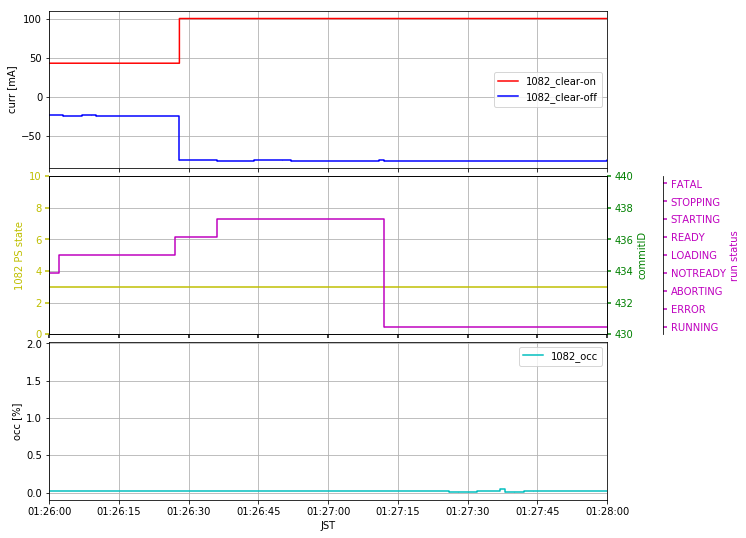

In [280]:
fig, ax = plt.subplots(3,figsize=(10,9), sharex=True)

#ax[0].plot_date([mdate.date2num(datetime.datetime.utcfromtimestamp(t)) for t in data_dict['1041']['occ']['secs']],data_dict['1041']['occ']['vals'], 'r-', label='1041')
#ax[0].set_title('occ')
#ax[0].legend()

def step_plot(ax, x, y, c='b', label=''):
    ax.step(x,y, c=c, where='post', label=label)
    p, = ax.plot_date(x,y, c=c, marker='o', markersize=0.1)
    return p
    
#c=[np.random.rand(3,) for x in range[20]]
c = ['r','b','y','g','m','c']

step_plot(ax[0], [mdate.date2num(datetime.datetime.fromtimestamp(t)) for t in data_dict['%s_clear-on'%dhe]['secs']],
          data_dict['%s_clear-on'%dhe]['vals'], c=c[0], label='%s_clear-on'%dhe)
step_plot(ax[0], [mdate.date2num(datetime.datetime.fromtimestamp(t)) for t in data_dict['%s_clear-off'%dhe]['secs']],
          data_dict['%s_clear-off'%dhe]['vals'], c=c[1], label='%s_clear-off'%dhe)

#x01 = [mdate.date2num(datetime.datetime.fromtimestamp(t)) for t in data_dict['%s_clear-off'%dhe]['secs']]
#y01 = data_dict['%s_clear-off'%dhe]['vals']
#ax[0].step(x01,y01, c=c[1], where='post', label='%s_clear-off'%dhe)
#ax[0].plot_date(x01,y01, c=c[1], marker='o', markersize=0.1)

ax[0].legend()
#ax[0].set_xlabel('JST')
ax[0].set_ylabel("curr [mA]")
ax[0].grid()
#ax[0].set_xlim(mdate.date2num(datetime.datetime.strptime('2019_10_10_11_15_0','%Y_%m_%d_%H_%M_%S')), mdate.date2num(datetime.datetime.strptime('2019_10_10_11_35_0','%Y_%m_%d_%H_%M_%S')))

par11 = ax[1].twinx()
par10 = ax[1].twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par11.spines["right"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

make_patch_spines_invisible(par11)
# Second, show the right spine.
par11.spines["right"].set_visible(True)

p1 = step_plot(ax[1], [mdate.date2num(datetime.datetime.fromtimestamp(t)) for t in data_dict['%s_state'%dhe]['secs']],
          data_dict['%s_state'%dhe]['vals'], c=c[2], label='%s_state'%dhe)
p2 = step_plot(par10, [mdate.date2num(datetime.datetime.fromtimestamp(t)) for t in data_dict['commitid']['secs']],
          data_dict['commitid']['vals'], c=c[3], label='commitid')
p3 = step_plot(par11, [mdate.date2num(datetime.datetime.fromtimestamp(t)) for t in data_dict['runstate']['secs']],
          data_dict['runstate']['vals'], c=c[4], label='runstate')
p4 = step_plot(ax[2], [mdate.date2num(datetime.datetime.fromtimestamp(t)) for t in data_dict['%s_occ'%dhe]['secs']],
          data_dict['%s_occ'%dhe]['vals'], c=c[5], label='%s_occ'%dhe)

#ax[1].legend()
#ax[1].set_xlabel('JST')
ax[1].grid()

ax[2].legend()
ax[2].set_xlabel('JST')
ax[2].set_ylabel('occ [%]')
ax[2].grid()

ax[1].set_ylabel("%s PS state"%dhe)
par10.set_ylabel("commitID")
par11.set_ylabel("run status")
ax[1].set_ylim(0,10)
par10.set_ylim(430,440)
#par11.set_ylim(0,15)

ax[1].yaxis.label.set_color(p1.get_color())
par10.yaxis.label.set_color(p2.get_color())
par11.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax[1].tick_params(axis='y', colors=p1.get_color(), **tkw)
par10.tick_params(axis='y', colors=p2.get_color(), **tkw)
par11.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax[1].tick_params(axis='x', **tkw)

plt.subplots_adjust(wspace=0, hspace=0.05)

#ax[1].set_xlim(mdate.date2num(start_datetime), mdate.date2num(stop_datetime))

#t0='2019_11_07 1:25:0'; t1='2019_11_07 1:30:0'
#t0='2019_11_07 1:33:0'; t1='2019_11_07 1:40:0'
#t0='2019_11_07 7:17:0'; t1='2019_11_07 7:21:0'
#t0='2019_11_07 22:35:0'; t1='2019_11_07 22:50:0'
#t0='2019_11_08 0:45:0'; t1='2019_11_08 1:15:0'
#t0='2019_11_08 0:55:0'; t1='2019_11_08 1:0:0'
#t0='2019_11_08 23:55:0'; t1='2019_11_09 0:15:0'
#t0='2019_11_09 1:56:0'; t1='2019_11_09 1:58:0'
#t0='2019_11_09 6:37:0'; t1='2019_11_09 6:39:0'
#t0='2019_11_10 1:35:0'; t1='2019_11_10 1:40:0'
#t0='2019_11_10 14:15:0'; t1='2019_11_10 14:50:0'
#t0='2019_11_10 22:52:0'; t1='2019_11_10 23:14:0'
#t0='2019_11_11 1:30:0'; t1='2019_11_11 2:10:0'
#t0='2019_11_11 3:30:0'; t1='2019_11_11 4:0:0'
#t0='2019_11_11 4:30:0'; t1='2019_11_11 4:50:0'
#t0='2019_11_11 5:45:0'; t1='2019_11_11 6:25:0'
#t0='2019_11_11 6:55:0'; t1='2019_11_11 7:5:0'
#t0='2019_11_11 18:15:0'; t1='2019_11_11 19:0:0'
#t0='2019_11_12 4:30:0'; t1='2019_11_12 5:00:0'
#t0='2019_11_12 6:0:0'; t1='2019_11_12 6:05:0'
#t0='2019_11_12 6:31:0'; t1='2019_11_12 6:34:0'
#t0='2019_11_13 1:35:0'; t1='2019_11_13 1:50:0'
#t0='2019_11_13 3:15:0'; t1='2019_11_13 3:25:0'
#t0='2019_11_13 4:46:0'; t1='2019_11_13 4:51:0'

t0='2019_11_7 1:26:0'; t1='2019_11_7 1:28:0'

ax[1].set_xlim(mdate.date2num(datetime.datetime.strptime(t0, "%Y_%m_%d %H:%M:%S")), 
               mdate.date2num(datetime.datetime.strptime(t1, "%Y_%m_%d %H:%M:%S")))

plt.show()


In [200]:
vals = data_dict['%s_clear-on'%dhe]['vals']
secs = data_dict['%s_clear-on'%dhe]['secs']
vals2 = data_dict['%s_clear-off'%dhe]['vals']
secs2 = data_dict['%s_clear-off'%dhe]['secs']

jumps = []
jumps_tpre = []
jumps_t = []
for i in range(len(vals)-1):
    if np.abs(vals[i]-43)<5 and np.abs(vals[i+1]-100)<5:
        jumps.append(i)
        jumps_tpre.append(secs[i])
        jumps_t.append(secs[i+1])

        print( '#',len(jumps))
        print( datetime.datetime.fromtimestamp(secs[i]), vals[i],\
            datetime.datetime.fromtimestamp(secs[i+1]), vals[i+1])
        print( datetime.datetime.fromtimestamp(secs2[np.searchsorted(secs2,secs[i])]),\
            vals2[np.searchsorted(secs2,secs[i])],\
            datetime.datetime.fromtimestamp(secs2[np.searchsorted(secs2,secs[i+1])]),\
            vals2[np.searchsorted(secs2,secs[i+1])])

idx=jumps[16]
print( 'idx 17')
for i in range(5):
    print( datetime.datetime.fromtimestamp(secs2[np.searchsorted(secs2,secs[idx+i])]),\
            vals2[np.searchsorted(secs2,secs[idx+i])])

# 1
2019-11-07 01:12:57 43 2019-11-07 01:26:28 100
2019-11-07 01:13:01 -24 2019-11-07 01:26:28 -81
# 2
2019-11-07 01:34:05 43 2019-11-07 01:36:38 100
2019-11-07 01:34:06 -24 2019-11-07 01:36:38 -81
# 3
2019-11-07 03:53:33 43 2019-11-07 07:18:42 100
2019-11-07 03:53:33 -24 2019-11-07 07:18:42 -80
# 4
2019-11-07 22:30:50 43 2019-11-07 22:41:47 100
2019-11-07 22:30:53 -24 2019-11-07 22:41:47 -80
# 5
2019-11-08 00:55:32 43 2019-11-08 00:58:52 99
2019-11-08 00:55:32 -24 2019-11-08 00:58:52 -80
# 6
2019-11-08 22:34:51 43 2019-11-09 00:03:41 100
2019-11-08 22:34:52 -24 2019-11-09 00:03:41 -81
# 7
2019-11-09 01:55:40 43 2019-11-09 01:57:17 100
2019-11-09 01:55:41 -24 2019-11-09 01:57:17 -80
# 8
2019-11-09 05:30:37 43 2019-11-09 06:37:37 100
2019-11-09 05:30:38 -24 2019-11-09 06:37:37 -80
# 9
2019-11-09 21:17:06 43 2019-11-10 01:36:29 99
2019-11-09 21:17:19 -24 2019-11-10 01:36:29 -80
# 10
2019-11-10 14:17:25 43 2019-11-10 14:28:35 100
2019-11-10 14:17:33 -24 2019-11-10 14:28:35 -81
# 11
2019-1

In [265]:
vals = data_dict['%s_state'%dhe]['vals']
secs = data_dict['%s_state'%dhe]['secs']

for i in range(len(vals)-1):
    if vals[i]==5 and vals[i+1]==3:
       
        print(datetime.datetime.fromtimestamp(secs[i]), vals[i],\
            datetime.datetime.fromtimestamp(secs[i+1]), vals[i+1])
        


2019-11-06 23:16:11 5 2019-11-06 23:17:09 3
2019-11-07 01:12:01 5 2019-11-07 01:12:58 3
2019-11-07 01:33:10 5 2019-11-07 01:34:05 3
2019-11-07 03:52:37 5 2019-11-07 03:53:34 3
2019-11-07 22:29:54 5 2019-11-07 22:30:51 3
2019-11-08 00:54:35 5 2019-11-08 00:55:33 3
2019-11-08 21:42:55 5 2019-11-08 21:43:51 3
2019-11-08 21:53:31 5 2019-11-08 21:54:30 3
2019-11-08 22:33:56 5 2019-11-08 22:34:52 3
2019-11-09 01:54:44 5 2019-11-09 01:55:41 3
2019-11-09 03:06:11 5 2019-11-09 03:07:08 3
2019-11-09 03:32:47 5 2019-11-09 03:33:44 3
2019-11-09 04:09:34 5 2019-11-09 04:10:32 3
2019-11-09 04:54:07 5 2019-11-09 04:55:03 3
2019-11-09 05:10:40 5 2019-11-09 05:11:36 3
2019-11-09 05:29:41 5 2019-11-09 05:30:38 3
2019-11-09 07:20:16 5 2019-11-09 07:21:15 3
2019-11-09 08:34:25 5 2019-11-09 08:35:24 3
2019-11-09 09:14:10 5 2019-11-09 09:15:06 3
2019-11-09 12:50:29 5 2019-11-09 12:51:26 3
2019-11-09 15:29:02 5 2019-11-09 15:29:59 3
2019-11-09 15:59:05 5 2019-11-09 16:00:03 3
2019-11-09 17:17:06 5 2019-11-09

In [220]:
for t in jumps_t:
    idx = np.searchsorted(data_dict['runstate']['secs'],t)
    print(datetime.datetime.fromtimestamp(t), '%ds'%(data_dict['runstate']['secs'][idx-1]-t), data_dict['runstate']['vals'][idx-1], \
        '%ds'%(data_dict['runstate']['secs'][idx]-t), data_dict['runstate']['vals'][idx])

2019-11-07 01:26:28 -1s READY 8s STARTING
2019-11-07 01:36:38 -26s LOADING 0s READY
2019-11-07 07:18:42 -37s ABORTING 2s NOTREADY
2019-11-07 22:41:47 -20s NOTREADY 83s LOADING
2019-11-08 00:58:52 -10s RUNNING 0s ERROR
2019-11-09 00:03:41 -1s FATAL 72s ABORTING
2019-11-09 01:57:17 -1s RUNNING 342s STOPPING
2019-11-09 06:37:37 -25s LOADING 0s READY
2019-11-10 01:36:29 -1s RUNNING 789s ERROR
2019-11-10 14:28:35 -108s NOTREADY 314s ABORTING
2019-11-10 21:32:25 -2s ABORTING 38s NOTREADY
2019-11-10 23:06:37 -1s ABORTING 38s NOTREADY
2019-11-11 01:40:09 -232s RUNNING 541s STOPPING
2019-11-11 03:34:59 -27s NOTREADY 782s LOADING
2019-11-11 03:50:00 -119s LOADING 0s ABORTING
2019-11-11 04:42:58 -1s RUNNING 567s STOPPING
2019-11-11 05:51:31 -64s STOPPING 0s ABORTING
2019-11-11 06:21:28 -1s RUNNING 355s STOPPING
2019-11-11 07:00:55 -2s NOTREADY 211s LOADING
2019-11-11 18:45:42 -1s RUNNING 326s STOPPING
2019-11-11 18:55:48 -168s NOTREADY 35s ABORTING
2019-11-11 19:56:39 -26s LOADING 0s READY
2019-1

In [256]:
vc_list = [
                "sw-sub", "sw-refin", "dhp-io", "dhp-core", "dcd-dvdd", "dcd-avdd", "dcd-refin", "dcd-amplow",
                "bulk", "clear-off", "clear-on", "gate-off", "gate-on1", "gate-on2", "gate-on3",
                "source", "ccg1", "ccg2", "ccg3", "drift", "hv", "guard"]

data_points={}

## pxd
archiver = epics_archiver.epics_archiver("172.22.18.80:80")
time.sleep(1)

for i in range(len(jumps_t)):
#for i in [1,2]:
    print()

    for vc in vc_list:
        if vc == 'clear-on' or vc == 'clear-off':
            continue
        data_points['%s_%d'%(vc,i)] = archiver.getData('PXD:P%s:%s:CURR:cur'%(dhe,vc), \
                        archiver.date_parser(datetime.datetime.fromtimestamp(jumps_t[i]-5)), archiver.date_parser(datetime.datetime.fromtimestamp(jumps_t[i]+5)))
        _max = np.max(data_points['%s_%d'%(vc,i)]['vals'])
        _min = np.min(data_points['%s_%d'%(vc,i)]['vals'])
        _mean = np.nanmean(data_points['%s_%d'%(vc,i)]['vals'])
        if(np.abs(_max-_min)>np.abs(_mean)*0.05):
            print(i)
            print(datetime.datetime.fromtimestamp(jumps_t[i]), vc)
            for k in range(len(data_points['%s_%d'%(vc,i)]['vals'])):
                print('%ds'%(data_points['%s_%d'%(vc,i)]['secs'][k]-jumps_t[i]), data_points['%s_%d'%(vc,i)]['vals'][k])


0
2019-11-07 01:26:28 gate-on1
-6s -5
-1s -5
1s -6
3s -5

1
2019-11-07 01:36:38 gate-on1
-9s -6
-5s -5
-4s -6
2s -6
4s -6

2
2019-11-07 07:18:42 gate-on1
-6s -5
-3s -5
-2s -5
0s -6
2s -5
4s -5

3
2019-11-07 22:41:47 gate-on1
-6s -5
-3s -6
-2s -5
0s -6
0s -5
3s -6

4
2019-11-08 00:58:52 gate-on1
-7s -5
-2s -6
-2s -5
1s -6
1s -5
3s -6
4s -5

5
2019-11-09 00:03:41 gate-on1
-7s -5
-3s -6
-2s -5
0s -6
2s -5
3s -6

6
2019-11-09 01:57:17 gate-on1
-6s -5
-4s -6
-3s -5
-1s -6
1s -5
2s -6
4s -5

7
2019-11-09 06:37:37 gate-on1
-6s -5
-4s -6
-2s -5
-1s -6
2s -5

8
2019-11-10 01:36:29 gate-on1
-6s -5
-3s -6
-1s -5
0s -6
2s -5
3s -6
4s -5

9
2019-11-10 14:28:35 gate-on1
-8s -5
-5s -6
-4s -5
-2s -6
0s -5
1s -6
3s -5
3s -6

10
2019-11-10 21:32:25 gate-on1
-6s -6
-4s -5
-3s -6
0s -5
1s -6
3s -5
3s -6
10
2019-11-10 21:32:25 hv
-12s -153
-3s -154
-2s -153
0s -157
1s -159
3s -160
4s -161

11
2019-11-10 23:06:37 gate-on1
-8s -6
-5s -5
-3s -6
-2s -5
-1s -6
0s -5
0s -6
1s -5
3s -6
4s -5

12
2019-11-11 01:40

In [258]:
data_points={}

## pxd
archiver = epics_archiver.epics_archiver("172.22.18.80:80")
time.sleep(1)

for i in range(len(jumps_t)):
#for i in [1,2]:

    for vc in vc_list:
        data_points['%s_%d'%(vc,i)] = archiver.getData('PXD:P%s:%s-load:VOLT:cur'%(dhe,vc), \
                        archiver.date_parser(datetime.datetime.fromtimestamp(jumps_t[i]-5)), archiver.date_parser(datetime.datetime.fromtimestamp(jumps_t[i]+5)))
        _max = np.max(data_points['%s_%d'%(vc,i)]['vals'])
        _min = np.min(data_points['%s_%d'%(vc,i)]['vals'])
        _mean = np.nanmean(data_points['%s_%d'%(vc,i)]['vals'])
        if(np.abs(_max-_min)>np.abs(_mean)*0.05):
            print i
            print datetime.datetime.fromtimestamp(jumps_t[i]), vc
            for k in range(len(data_points['%s_%d'%(vc,i)]['vals'])):
                print '%ds'%(data_points['%s_%d'%(vc,i)]['secs'][k]-jumps_t[i]), data_points['%s_%d'%(vc,i)]['vals'][k]






















20
2019-11-11 18:55:48 gate-on1
-8s -3873
2s -3869
3s -3873
3s -2871
3s -1872
3s -874
3s -878
4s 128
4s 1122
4s 1126
4s 1130
4s 1122
20
2019-11-11 18:55:48 gate-on2
-6s -3921
1s -1900
2s -889
2s 120
2s 1131
3s 1127
3s 1131
3s 1127
4s 1135
4s 1123
4s 1131
4s 1135
20
2019-11-11 18:55:48 gate-on3
-7s -3939
1s 1133
1s 1129
2s 1125
2s 1129
2s 1125
3s 1133
3s 1129
3s 1125
4s 1129
4s 1125
4s 1129
20
2019-11-11 18:55:48 guard
-7s -5003
-3s -5003
-2s -4998
-1s -5003
0s -4998
1s -5003
3s -4998
3s -5003
4s -4998
4s -5003
4s -4004
4s -3000












In [272]:
data_points={}

## pxd
archiver = epics_archiver.epics_archiver("172.22.18.80:80")
time.sleep(1)

dhe='1081'
for i in range(len(jumps_t)):
    print 

    for j in [1,2,3,4]:
        data_points['tmp_%d'%(i)] = archiver.getData('PXD:U%s:D%d:temperature:TEMP:cur'%(dhe,j), \
                        archiver.date_parser(datetime.datetime.fromtimestamp(jumps_t[i]-5)), archiver.date_parser(datetime.datetime.fromtimestamp(jumps_t[i]+25)))
        _max = np.max(data_points['tmp_%d'%(i)]['vals'])
        _min = np.min(data_points['tmp_%d'%(i)]['vals'])
        _mean = np.nanmean(data_points['tmp_%d'%(i)]['vals'])

        #if(np.abs(_max-_min)>np.abs(_mean)*0.05):
        if(np.abs(_max-_min)>2):

            print datetime.datetime.fromtimestamp(jumps_t[i]), 'DHP%d temp'%j
            for k in range(len(data_points['tmp_%d'%(i)]['vals'])):
                print '%ds'%(data_points['tmp_%d'%(i)]['secs'][k]-jumps_t[i]), data_points['tmp_%d'%(i)]['vals'][k]



2019-11-07 01:26:28 DHP2 temp
-12s 46.2378383182
24s 43.8494860262
2019-11-07 01:26:28 DHP4 temp
-12s 33.0188831193
24s 35.4583231608

2019-11-07 01:36:38 DHP2 temp
-29s 46.6720841895
7s 49.4946823527
2019-11-07 01:36:38 DHP4 temp
-29s 33.4531289906
7s 38.2681493867



2019-11-08 00:58:52 DHP2 temp
-31s 44.9478726418
5s 48.1536289267
2019-11-08 00:58:52 DHP3 temp
-31s 35.5860425347
5s 41.4355898595
2019-11-08 00:58:52 DHP4 temp
-31s 33.1338305558
5s 37.3102540824

2019-11-09 00:03:41 DHP1 temp
-37s 41.8953796055
-1s 47.0552423112
2019-11-09 00:03:41 DHP2 temp
-37s 46.7487158138
-1s 43.7217666523
2019-11-09 00:03:41 DHP3 temp
-37s 39.91572931
-1s 35.496638973

2019-11-09 01:57:17 DHP1 temp
-27s 47.9109621163
10s 42.5084326002
2019-11-09 01:57:17 DHP3 temp
-27s 38.3703248858
10s 35.4710950982
2019-11-09 01:57:17 DHP4 temp
-27s 35.6243583469
10s 33.0955147436

2019-11-09 06:37:37 DHP1 temp
-27s 41.9464673551
9s 47.1318739355

2019-11-10 01:36:29 DHP1 temp
-17s 42.8532749098
20s 47.131873